# Sklearn RFC with generated tfidf features

In [1]:
import pandas
import numpy as np
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#  Load the data from combined_df.csv
combined_df = pandas.read_csv('../datasets/combined_df.csv')


In [3]:
# Tokenize and clean text data
combined_df['post'] = combined_df['post'].apply(lambda x: x.lower())  # Convert to lowercase

In [4]:
nltk.download('punkt') 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Cleaning and lemmatizing the data

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Tokenization and removing punctuation
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    
    # Removing stop words and lemmatization
    stop_words = set(stopwords.words("english"))
    words = [WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)
    
combined_df['cleaned_posts'] = combined_df['post'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
X_tfidf = tfidf_vectorizer.fit_transform(combined_df['cleaned_posts'])

In [7]:
X_tfidf_array = X_tfidf.toarray()  # Convert TF-IDF matrix to a dense array

In [8]:
shape_tfidf = X_tfidf_array.shape
# Create an empty array to accommodate the combined data
X_combined = np.empty((shape_tfidf[0], shape_tfidf[1] + 1))
X_combined[: , :shape_tfidf[1]] = X_tfidf_array

In [9]:
from sklearn.model_selection import train_test_split

y = combined_df['subreddit']  # Target

In [10]:
# Oversample this data for better results
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_combined, y = ros.fit_resample(X_combined, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_combined  , y, test_size=0.2, random_state=42)

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

## Fitting the data and predicting with the model

In [13]:
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', verbose=2)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


## Results

In [ ]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69      1577
           1       0.85      0.81      0.83      9182
           2       0.74      0.76      0.75      1254
           3       0.82      0.75      0.78     11419
           4       0.88      0.70      0.78      1754
           5       0.93      0.53      0.68      4899
           6       0.56      0.77      0.65     23472
           7       0.68      0.53      0.60      4724
           8       0.81      0.63      0.71      1766
           9       0.85      0.52      0.64      1788
          10       0.65      0.52      0.58     13065

    accuracy                           0.68     74900
   macro avg       0.78      0.65      0.70     74900
weighted avg       0.71      0.68      0.68     74900



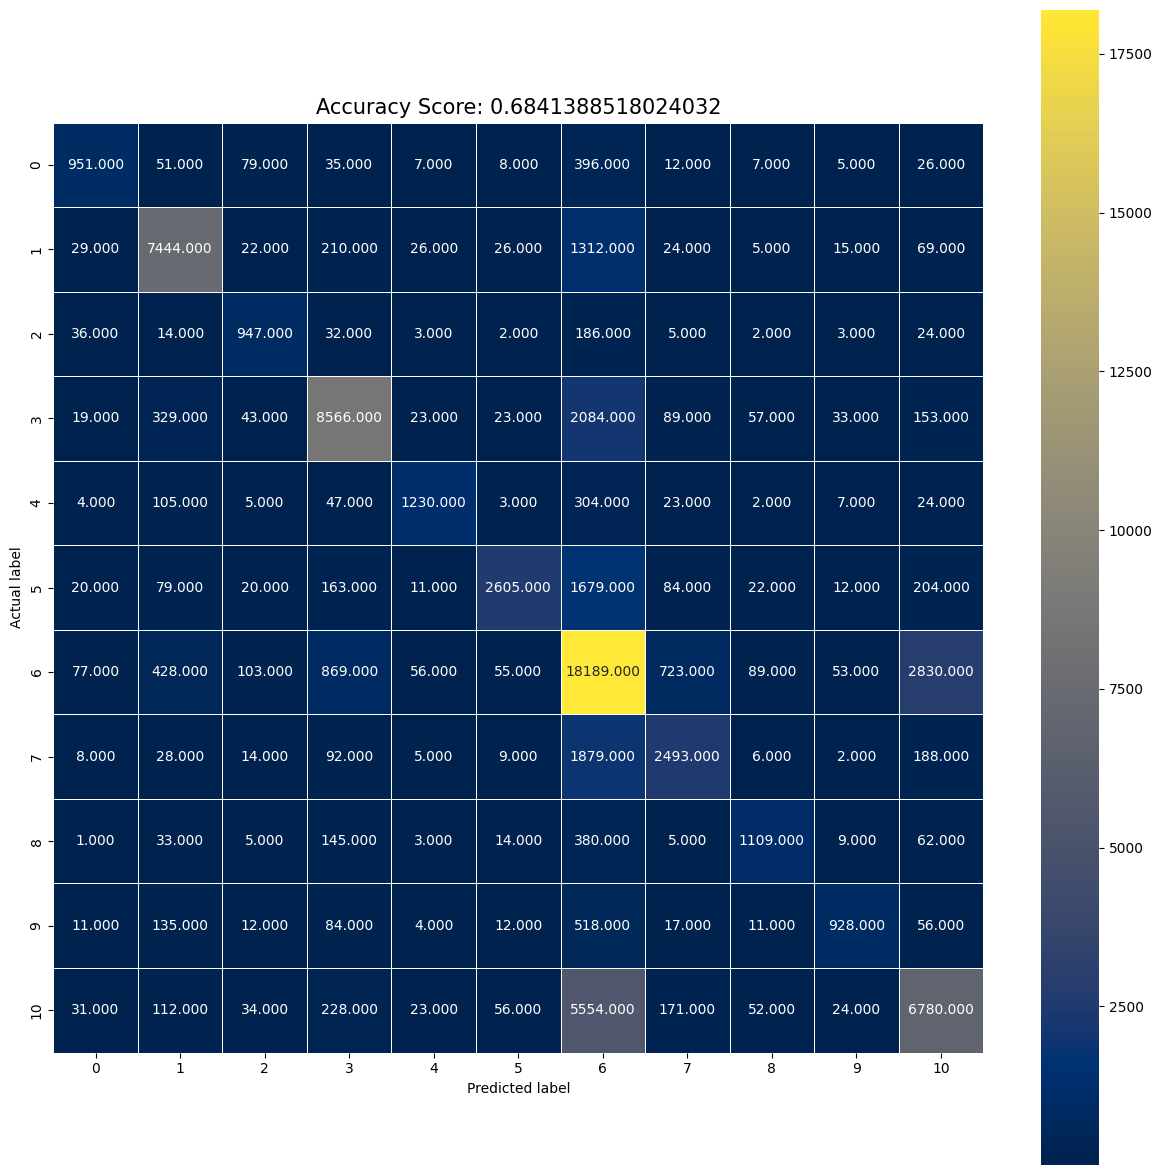

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy), size=15)
plt.show()